In [ ]:
!pip install kaggle

# importing the dataset

In [ ]:
# -----------------------------------------------------------
# ✅ Step 1: Create a hidden directory named ".kaggle"
#    inside your home directory (~).
#    This folder stores your Kaggle API key securely.
# -----------------------------------------------------------
!mkdir -p ~/.kaggle

# -----------------------------------------------------------
# ✅ Step 2: Copy the "kaggle.json" file (your Kaggle API key)
#    into the newly created ~/.kaggle directory.
#    Make sure kaggle.json is in your current working directory before running this.
# -----------------------------------------------------------
!cp kaggle.json ~/.kaggle/

# -----------------------------------------------------------
# ✅ Step 3: Change file permissions for kaggle.json.
#    This ensures only you (the current user) can read and write it.
#    Kaggle API requires this secure permission level (600).
# -----------------------------------------------------------
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# -----------------------------------------------------------
# ✅ Step 1: Import the ZipFile class from the zipfile module.
#    This module is part of Python’s standard library and
#    allows you to work with ZIP archive files (extract, create, etc.).
# -----------------------------------------------------------
from zipfile import ZipFile

# -----------------------------------------------------------
# ✅ Step 2: Specify the ZIP file name you want to extract.
#    Make sure "face-mask-dataset.zip" exists in your working directory.
# -----------------------------------------------------------
dataset = "face-mask-dataset.zip"

# -----------------------------------------------------------
# ✅ Step 3: Open the ZIP file in read ('r') mode using a context manager.
#    This ensures the file is automatically closed after extraction.
# -----------------------------------------------------------
with ZipFile(dataset, 'r') as zip:

    # ✅ Step 4: Extract all files from the ZIP archive
    #    into the current working directory.
    zip.extractall()

    # ✅ Step 5: Print a confirmation message when extraction is complete.
    print('✅ Extraction complete! All files have been unpacked successfully.')


✅ Extraction complete! All files have been unpacked successfully.


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


# importing the dependecies

In [ ]:
# -----------------------------------------------------------
# ✅ Step 1: Import essential Python libraries
# -----------------------------------------------------------

# 📁 'os' is used for interacting with the operating system.
#     Helps in navigating directories, reading file paths, etc.
import os

# 🔢 'numpy' is used for numerical operations and array manipulation.
#     It’s essential for handling image data as numerical arrays.
import numpy as np

# 🎨 'matplotlib.pyplot' is used for visualizing data.
#     Commonly used to plot graphs or show images.
import matplotlib.pyplot as plt

# 🖼️ 'matplotlib.image' (mpimg) helps in reading and displaying image files.
#     You can load images directly as arrays using mpimg.imread().
import matplotlib.image as mpimg

# 📷 'cv2' (OpenCV) is a powerful library for image processing.
#     You can resize, crop, apply filters, convert color formats, etc.
import cv2

# 🎲 'random' is used for generating random numbers or selecting random samples.
#     Useful for data augmentation or visualizing random dataset samples.
import random

# 💾 'pickle' is used for saving and loading Python objects in binary format.
#     Often used to store preprocessed data, trained models, or label encoders.
import pickle

# 👁️ 'google.colab.patches' provides a function (cv2_imshow)
#     to display OpenCV images properly inside Google Colab notebooks.
#     (Normal cv2.imshow() doesn’t work in Colab.)
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split


In [ ]:
# -----------------------------------------------------------
# ✅ Step 1: List all image files inside the folder 'with_mask'
# -----------------------------------------------------------

# 'os.listdir()' returns a list of all files and folders inside a given directory.
# Here, we are listing all images stored in the "with_mask" subfolder.
# Make sure the path '/content/data/with_mask' exists (this is typical in Google Colab).
with_mask_files = os.listdir('/content/data/with_mask')

# -----------------------------------------------------------
# ✅ Step 2: Print the first 5 file names in the list
# -----------------------------------------------------------

# This helps you verify that the directory contains the expected image files.
print(with_mask_files[0:5])  # Display the first 5 image file names

# -----------------------------------------------------------
# ✅ Step 3: Print the last 5 file names in the list
# -----------------------------------------------------------

# This ensures you’re seeing both the start and end of the dataset list,
# confirming that files have been read correctly.
print(with_mask_files[-5:])  # Display the last 5 image file names


['with_mask_556.jpg', 'with_mask_2161.jpg', 'with_mask_1316.jpg', 'with_mask_2743.jpg', 'with_mask_570.jpg']
['with_mask_709.jpg', 'with_mask_1027.jpg', 'with_mask_2178.jpg', 'with_mask_816.jpg', 'with_mask_336.jpg']


In [ ]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_619.jpg', 'without_mask_190.jpg', 'without_mask_3355.jpg', 'without_mask_2873.jpg', 'without_mask_1307.jpg']
['without_mask_236.jpg', 'without_mask_3395.jpg', 'without_mask_1149.jpg', 'without_mask_290.jpg', 'without_mask_1901.jpg']


In [ ]:
# -----------------------------------------------------------
# ✅ Count how many image files are in the 'with_mask' folder
# -----------------------------------------------------------

# len() returns the total number of elements in a list.
# Since 'with_mask_files' contains all filenames, we can use len() to count them.
num_with_mask = len(with_mask_files)
num_without_mask = len(without_mask_files)
# -----------------------------------------------------------
# ✅ Print the result
# -----------------------------------------------------------
print(f"Total number of images in 'with_mask' folder: {num_with_mask}")
print(f"Total number of images in 'without_mask' folder: {num_without_mask}")

Total number of images in 'with_mask' folder: 3725
Total number of images in 'without_mask' folder: 3828


#LABELING THE DATAA

In [ ]:
# -----------------------------------------------------------
# ✅ Step 1: Create labels for each image category manually
# -----------------------------------------------------------

# For "with_mask" images:
# There are 3,725 images — each should have the label 1
with_mask_label = [1] * 3725   # creates [1, 1, 1, ..., 1] (3725 times)

# For "without_mask" images:
# There are 3,828 images — each should have the label 0
without_mask_label = [0] * 3828  # creates [0, 0, 0, ..., 0] (3828 times)

# -----------------------------------------------------------
# ✅ Step 2: Verify the label lengths
# -----------------------------------------------------------
print("Number of 'with_mask' labels:", len(with_mask_label))
print("Number of 'without_mask' labels:", len(without_mask_label))


Number of 'with_mask' labels: 3725
Number of 'without_mask' labels: 3828


In [ ]:
print(with_mask_label[0:5])
print(without_mask_label[0:5])
print(len(with_mask_label))
print(len(without_mask_label))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828


In [ ]:
# -----------------------------------------------------------
# ✅ Step 1: Combine labels of both classes into one list
# -----------------------------------------------------------

# '+' operator concatenates the two label lists.
# First part: all 1s for "with_mask"
# Second part: all 0s for "without_mask"
labels = with_mask_label + without_mask_label

# -----------------------------------------------------------
# ✅ Step 2: Check the total number of labels
# -----------------------------------------------------------

# len(labels) gives the total number of images (both classes combined)
print("Total number of labels:", len(labels))

# -----------------------------------------------------------
# ✅ Step 3: Preview some labels from the start and end
# -----------------------------------------------------------

# First 5 labels → should be [1, 1, 1, 1, 1] (from 'with_mask')
print("First 5 labels:", labels[0:5])

# Last 5 labels → should be [0, 0, 0, 0, 0] (from 'without_mask')
print("Last 5 labels:", labels[-5:])


Total number of labels: 7553
First 5 labels: [1, 1, 1, 1, 1]
Last 5 labels: [0, 0, 0, 0, 0]


# displying the with mask image

<function matplotlib.pyplot.show(close=None, block=None)>

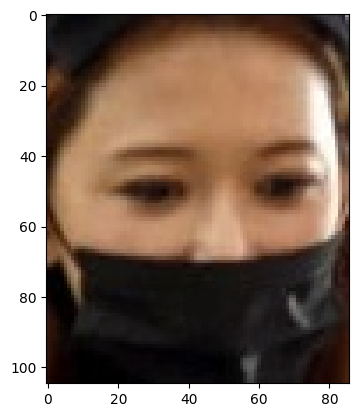

In [ ]:
img=mpimg.imread('/content/data/with_mask/with_mask_100.jpg')
imgplot=plt.imshow(img)
plt.show

# image processing

In [ ]:
# -----------------------------------------------------------
# 🧠 FACE MASK DETECTION — DATA AUGMENTATION & PREPROCESSING
# -----------------------------------------------------------
# In this section, we will:
# 1. Load images from both 'with_mask' and 'without_mask' folders.
# 2. Resize each image to a fixed shape (100x100).
# 3. Apply data augmentation to make the model more robust.
# 4. Convert all processed images and labels into NumPy arrays.
# -----------------------------------------------------------

# -----------------------------------------------------------
# ✅ Step 1: Import all necessary libraries
# -----------------------------------------------------------
import os                      # For handling file and folder paths
import cv2                     # OpenCV library for reading and processing images
import numpy as np              # For numerical operations and array handling
import random                   # For random operations (e.g., shuffling)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator is used to perform data augmentation automatically.

# -----------------------------------------------------------
# ✅ Step 2: Define the dataset paths (folders containing images)
# -----------------------------------------------------------
# The dataset contains two categories:
# - with_mask: people wearing masks
# - without_mask: people not wearing masks

with_mask_path = '/content/data/with_mask'        # Path to folder with mask images
without_mask_path = '/content/data/without_mask'  # Path to folder without mask images

# -----------------------------------------------------------
# ✅ Step 3: Create empty lists to store image data and labels
# -----------------------------------------------------------
data = []     # Will hold all image arrays
labels = []   # Will hold corresponding class labels (1 for mask, 0 for no mask)

# -----------------------------------------------------------
# ✅ Step 4: Initialize ImageDataGenerator for data augmentation
# -----------------------------------------------------------
# This generator will apply small random changes to the images (rotations, flips, zooms, etc.)
# It helps the model generalize better and not overfit.
datagen = ImageDataGenerator(
    rotation_range=20,        # Randomly rotate the image up to 20 degrees
    width_shift_range=0.1,    # Shift the image horizontally by up to 10%
    height_shift_range=0.1,   # Shift the image vertically by up to 10%
    shear_range=0.1,          # Apply shear transformation
    zoom_range=0.1,           # Zoom into the image randomly up to 10%
    horizontal_flip=True,     # Flip image horizontally (mirror)
    fill_mode='nearest'       # Fill empty pixels created during transformations
)

# -----------------------------------------------------------
# ✅ Step 5: Define a helper function to load and preprocess images
# -----------------------------------------------------------
def load_and_preprocess_images(folder_path, label):
    """
    Loads images from the given folder, resizes them, augments them,
    and appends them to global data and labels lists.

    Parameters:
    folder_path (str): Path to the folder containing images
    label (int): Numeric label (1 = with mask, 0 = without mask)
    """
    # Loop through all files (images) in the folder
    for file in os.listdir(folder_path):
        try:
            # Get the full image path
            img_path = os.path.join(folder_path, file)

            # Read the image using OpenCV
            img = cv2.imread(img_path)

            # Proceed only if the image is successfully read
            if img is not None:
                # Resize image to a fixed size (100x100 pixels)
                img = cv2.resize(img, (100, 100))

                # Convert image color from BGR (default OpenCV format) to RGB
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Add the original image to data list
                data.append(img)

                # Add corresponding label to labels list
                labels.append(label)

                # -----------------------------------------------------------
                # 🌀 Data Augmentation (Create 1 additional augmented image)
                # -----------------------------------------------------------
                # Expand dimensions to match generator input shape (1, 100, 100, 3)
                img_expanded = np.expand_dims(img, axis=0)

                # Generate one augmented image using datagen
                for batch in datagen.flow(img_expanded, batch_size=1):
                    # Add the augmented image to data list
                    data.append(batch[0].astype('uint8'))
                    # Add the same label for augmented image
                    labels.append(label)
                    break  # Only generate one new image per original image
        except Exception as e:
            # If any error occurs (like unreadable image), print it and skip that file
            print(f"Error loading image {file}: {e}")

# -----------------------------------------------------------
# ✅ Step 6: Load images for both categories
# -----------------------------------------------------------
print("Loading 'with_mask' images...")
load_and_preprocess_images(with_mask_path, 1)   # Label = 1 for with_mask

print("Loading 'without_mask' images...")
load_and_preprocess_images(without_mask_path, 0) # Label = 0 for without_mask

# -----------------------------------------------------------
# ✅ Step 7: Convert lists into NumPy arrays for ML model input
# -----------------------------------------------------------
# Convert data and labels to NumPy format (used in TensorFlow/Keras)
X = np.array(data)   # Image data array
y = np.array(labels) # Corresponding labels

# -----------------------------------------------------------
# ✅ Step 8: Display dataset information
# -----------------------------------------------------------
print("✅ Data augmentation and preprocessing complete!")
print("Total number of images:", X.shape[0])   # Total count of all (original + augmented) images
print("Image shape:", X.shape[1:])             # Each image's dimensions (height, width, channels)
print("Labels shape:", y.shape)                # Total count of labels (same as total images)


Loading 'with_mask' images...
Loading 'without_mask' images...
✅ Data augmentation and preprocessing complete!
Total number of images: 15106
Image shape: (100, 100, 3)
Labels shape: (15106,)


In [ ]:
data[0].shape

(100, 100, 3)

In [ ]:
type(X)

numpy.ndarray

# train test split

In [ ]:
# -----------------------------------------------------------
# ✅ Step 8: Train-Test Split
# -----------------------------------------------------------

from sklearn.model_selection import train_test_split

# Split data first (before normalization)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# -----------------------------------------------------------
# ✅ Step 9: Normalize both training and testing data
# -----------------------------------------------------------

# Pixel values are between 0–255 → scale to 0–1
X_train = X_train / 255.0
X_test = X_test / 255.0

# -----------------------------------------------------------
# ✅ Step 10: Verify shapes and scaling
# -----------------------------------------------------------
print("✅ Dataset successfully split and normalized!")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

# Optional: Check min and max values to confirm normalization
print("Min pixel value:", X_train.min(), "| Max pixel value:", X_train.max())


✅ Dataset successfully split and normalized!
Training data shape: (12084, 100, 100, 3)
Testing data shape: (3022, 100, 100, 3)
Training labels shape: (12084,)
Testing labels shape: (3022,)
Min pixel value: 0.0 | Max pixel value: 1.0


array([[[ 88, 122, 108],
        [ 82, 108,  92],
        [ 48,  50,  52],
        ...,
        [ 33,  30,  37],
        [ 33,  30,  37],
        [ 30,  29,  35]],

       [[128, 159, 154],
        [ 64,  89,  81],
        [ 33,  32,  38],
        ...,
        [ 30,  29,  35],
        [ 31,  30,  36],
        [ 32,  31,  37]],

       [[130, 154, 156],
        [106, 125, 123],
        [ 52,  57,  57],
        ...,
        [ 31,  30,  36],
        [ 29,  28,  34],
        [ 32,  31,  37]],

       ...,

       [[200, 104,  88],
        [188,  85,  70],
        [177,  71,  58],
        ...,
        [216, 217, 212],
        [214, 215, 210],
        [216, 217, 212]],

       [[193,  90,  75],
        [187,  81,  67],
        [168,  62,  51],
        ...,
        [216, 217, 212],
        [217, 218, 213],
        [217, 218, 213]],

       [[201, 101,  85],
        [195,  89,  75],
        [170,  62,  49],
        ...,
        [214, 215, 210],
        [215, 216, 211],
        [220, 221, 216]]], dtype=uint8)
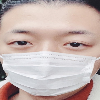

In [ ]:
data[0]

# building the neural network

In [ ]:
# -----------------------------------------------------------
# ✅ Step 11: Building the CNN Model
# -----------------------------------------------------------

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Initialize the CNN model
model = Sequential()

# -----------------------------------------------------------
# 🔹 1st Convolution Block
# -----------------------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(BatchNormalization())          # Normalize activations
model.add(MaxPooling2D(pool_size=(2, 2))) # Reduce spatial size
model.add(Dropout(0.25))                 # Randomly drop 25% neurons to prevent overfitting

# -----------------------------------------------------------
# 🔹 2nd Convolution Block
# -----------------------------------------------------------
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# -----------------------------------------------------------
# 🔹 3rd Convolution Block
# -----------------------------------------------------------
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# -----------------------------------------------------------
# 🔹 Flatten + Dense Layers (Fully Connected)
# -----------------------------------------------------------
model.add(Flatten())                    # Convert 2D → 1D vector
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))                 # Dropout for regularization

# -----------------------------------------------------------
# 🔹 Output Layer
# -----------------------------------------------------------
model.add(Dense(1, activation='sigmoid'))  # Binary classification (mask / no mask)

# -----------------------------------------------------------

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,733,313 (6.61 MB)

 Trainable params: 1,732,609 (6.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
model.compile(
    optimizer='adam',                 # Adam optimizer (adaptive learning)
    loss='binary_crossentropy',       # Binary classification loss
    metrics=['accuracy']              # Track accuracy
)

In [ ]:
# -----------------------------------------------------------
# ✅ Step 13: Model Training with Early Stopping
# -----------------------------------------------------------
'''
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 🔹 EarlyStopping Callback
# -----------------------------------------------------------
# Stops training when validation loss doesn't improve for 5 epochs
early_stop = EarlyStopping(
    monitor='val_loss',       # Watch validation loss
    patience=5,               # Stop if no improvement for 5 epochs
    restore_best_weights=True # Restore the best model
)

# -----------------------------------------------------------
# 🔹 Train the model
# -----------------------------------------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,     # 20% of training data used for validation
    epochs=30,                # Maximum number of epochs
    batch_size=32,            # Number of images per training step
    callbacks=[early_stop],   # Add early stopping
    verbose=1                 # Show training progress
)

# -----------------------------------------------------------
# ✅ Step 14: Evaluate on Test Data
# -----------------------------------------------------------
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"✅ Test Accuracy: {test_accuracy*100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")

# -----------------------------------------------------------
# ✅ Step 15: Plot Training Curves
# -----------------------------------------------------------

# Plot Accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''

'\nfrom tensorflow.keras.callbacks import EarlyStopping\nimport matplotlib.pyplot as plt\n\n# -----------------------------------------------------------\n# 🔹 EarlyStopping Callback\n# -----------------------------------------------------------\n# Stops training when validation loss doesn\'t improve for 5 epochs\nearly_stop = EarlyStopping(\n    monitor=\'val_loss\',       # Watch validation loss\n    patience=5,               # Stop if no improvement for 5 epochs\n    restore_best_weights=True # Restore the best model\n)\n\n# -----------------------------------------------------------\n# 🔹 Train the model\n# -----------------------------------------------------------\nhistory = model.fit(\n    X_train, y_train, \n    validation_split=0.2,     # 20% of training data used for validation\n    epochs=30,                # Maximum number of epochs\n    batch_size=32,            # Number of images per training step\n    callbacks=[early_stop],   # Add early stopping\n    verbose=1           

Epoch 1/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8372 - loss: 0.4089 - val_accuracy: 0.5172 - val_loss: 1.7105
Epoch 2/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9095 - loss: 0.2303 - val_accuracy: 0.7013 - val_loss: 0.5701
Epoch 3/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9115 - loss: 0.2159 - val_accuracy: 0.8945 - val_loss: 0.2576
Epoch 4/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9403 - loss: 0.1617 - val_accuracy: 0.9528 - val_loss: 0.1293
Epoch 5/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9482 - loss: 0.1332 - val_accuracy: 0.9293 - val_loss: 0.1781
Epoch 6/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9581 - loss: 0.1116 - val_accuracy: 0.9421 - val_loss: 0.1542
Epoch 7/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9608 - loss: 0.1031 - val_accuracy: 0.9115 - val_loss: 0.2087
Epoch 8/40
303/303 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9681 - loss: 0.0858 - val_acc

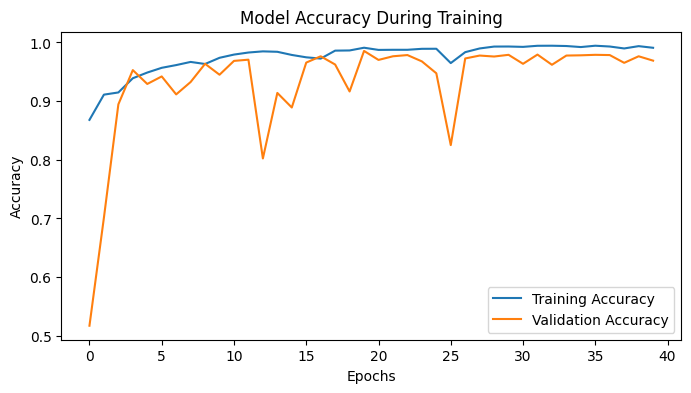

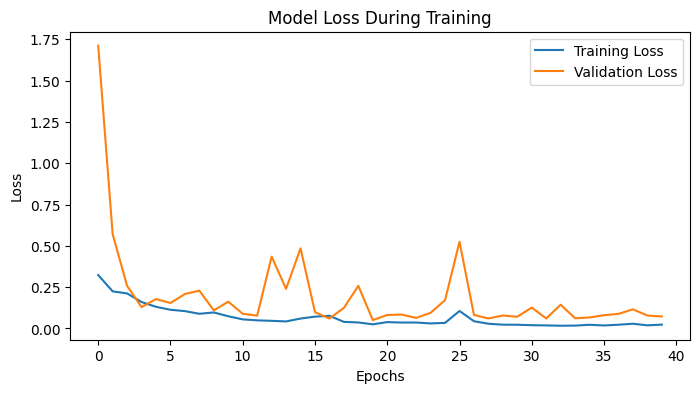

In [ ]:
# -----------------------------------------------------------
# ✅ Step 13: Model Training (Without Early Stopping)
# -----------------------------------------------------------

import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 🔹 Train the model normally
# -----------------------------------------------------------
# We’ll use 20 epochs; you can increase if accuracy keeps improving.
history = model.fit(
    X_train, y_train,
    validation_split=0.2,     # 20% of training data for validation
    epochs=40,                # Fixed number of epochs (no early stop)
    batch_size=32,            # Number of images processed per step
    verbose=1                 # Show training progress
)

# -----------------------------------------------------------
# ✅ Step 14: Evaluate Model on Test Data
# -----------------------------------------------------------
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"✅ Test Accuracy: {test_accuracy*100:.2f}%")
print(f"✅ Test Loss: {test_loss:.4f}")

# -----------------------------------------------------------
# ✅ Step 15: Plot Training Accuracy & Loss
# -----------------------------------------------------------

# Plot Accuracy curve
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss curve
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# -----------------------------------------------------------
# ✅ Step 16: Evaluate the Model on Test Data
# -----------------------------------------------------------

# Evaluate model performance on unseen (test) data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Display results
print("✅ Model Evaluation Results:")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# -----------------------------------------------------------
# ✅ Step 17: Save the Model for Future Use
# -----------------------------------------------------------

# Save the trained model in HDF5 format (.h5)
model.save("face_mask_detector.h5")

print("💾 Model saved successfully as 'face_mask_detector.h5'")

# -----------------------------------------------------------
# ✅ Step 18: Optional — Reload Model to Confirm It Works
# -----------------------------------------------------------

from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("face_mask_detector.h5")

# Evaluate again (to verify the loaded model works correctly)
loss, acc = loaded_model.evaluate(X_test, y_test, verbose=0)
print(f"🔁 Reloaded Model Accuracy: {acc*100:.2f}%")


95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9756 - loss: 0.0834


✅ Model Evaluation Results:
Test Accuracy: 97.52%
Test Loss: 0.0816
💾 Model saved successfully as 'face_mask_detector.h5'


🔁 Reloaded Model Accuracy: 97.52%


✅ Model loaded successfully!


Saving mask.jpg to mask.jpg

📂 Uploaded file: mask.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 686ms/step


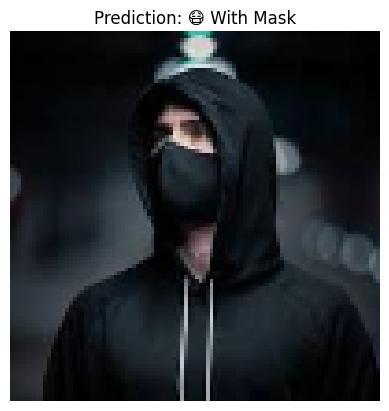

✅ Prediction Result: 😷 With Mask (Confidence: 1.00)


In [ ]:
# -----------------------------------------------------------
# ✅ Step 19: Predict on Custom User Image
# -----------------------------------------------------------

from tensorflow.keras.models import load_model
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 🔹 1. Load your trained model
# -----------------------------------------------------------
model = load_model("face_mask_detector.h5")
print("✅ Model loaded successfully!")

# -----------------------------------------------------------
# 🔹 2. Let user upload an image
# -----------------------------------------------------------
uploaded = files.upload()  # Opens a file picker for the user

for file_name in uploaded.keys():
    print(f"\n📂 Uploaded file: {file_name}")

    # -----------------------------------------------------------
    # 🔹 3. Read and preprocess the uploaded image
    # -----------------------------------------------------------
    img_path = file_name
    img = cv2.imread(img_path)

    # Check if image loaded correctly
    if img is None:
        print("❌ Error: Could not load image.")
        continue

    # Resize to same size as training images
    img = cv2.resize(img, (100, 100))

    # Convert BGR → RGB (since OpenCV loads in BGR format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Normalize pixel values (0–1 range)
    img_normalized = img_rgb / 255.0

    # Expand dimensions → model expects (1, 100, 100, 3)
    img_input = np.expand_dims(img_normalized, axis=0)

    # -----------------------------------------------------------
    # 🔹 4. Make prediction
    # -----------------------------------------------------------
    prediction = model.predict(img_input)[0][0]  # single output value between 0–1

    # -----------------------------------------------------------
    # 🔹 5. Interpret result
    # -----------------------------------------------------------
    if prediction >= 0.5:
        label = "😷 With Mask"
        color = (0, 255, 0)  # green
    else:
        label = "❌ Without Mask"
        color = (255, 0, 0)  # red

    # -----------------------------------------------------------
    # 🔹 6. Display image with prediction
    # -----------------------------------------------------------
    plt.imshow(img_rgb)
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()

    print(f"✅ Prediction Result: {label} (Confidence: {prediction:.2f})")


In [ ]:
# ✅ Save model in new Keras format
model.save('face_mask_detector.keras')

print("💾 Model saved successfully as 'face_mask_detector.keras'")

# ✅ Load the saved model
from tensorflow.keras.models import load_model
loaded_model = load_model('face_mask_detector.keras')

# Evaluate again to confirm it's working
loss, acc = loaded_model.evaluate(X_test, y_test)
print(f"🔁 Reloaded Model Accuracy: {acc * 100:.2f}%")
print(f"Reloaded Model Loss: {loss:.4f}")



💾 Model saved successfully as 'face_mask_detector.keras'


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 38 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9756 - loss: 0.0834
🔁 Reloaded Model Accuracy: 97.52%
Reloaded Model Loss: 0.0816
